#### Importing

##### Importing models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

##### Importing common libraries

In [38]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [39]:
df = pd.read_csv("./data/raw/raw.csv")
print(df.head())

   Unnamed: 0    v1                                                 v2  \
0           0   ham  Go until jurong point, crazy.. Available only ...   
1           1   ham                      Ok lar... Joking wif u oni...   
2           2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3           3   ham  U dun say so early hor... U c already then say...   
4           4   ham  Nah I don't think he goes to usf, he lives aro...   

  Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN  
1        NaN        NaN        NaN  
2        NaN        NaN        NaN  
3        NaN        NaN        NaN  
4        NaN        NaN        NaN  


#### Analyze the DATA 

In [40]:
print("---------------------------------------------------------------")
print(df.info())
print("---------------------------------------------------------------")
print(df.describe())
print("---------------------------------------------------------------")
print(df.shape)
print("---------------------------------------------------------------")
print(df['v1'].value_counts())

print("---------------------------------------------------------------")
print("Ratio: ",round(4825/747,1))

---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   v1          5572 non-null   object
 2   v2          5572 non-null   object
 3   Unnamed: 2  50 non-null     object
 4   Unnamed: 3  12 non-null     object
 5   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(5)
memory usage: 261.3+ KB
None
---------------------------------------------------------------
        Unnamed: 0
count  5572.000000
mean   2785.500000
std    1608.642181
min       0.000000
25%    1392.750000
50%    2785.500000
75%    4178.250000
max    5571.000000
---------------------------------------------------------------
(5572, 6)
---------------------------------------------------------------
v1
ham     4825
spam     747
Name: count, dtype: int64
-------------------------

#### Visualize the data

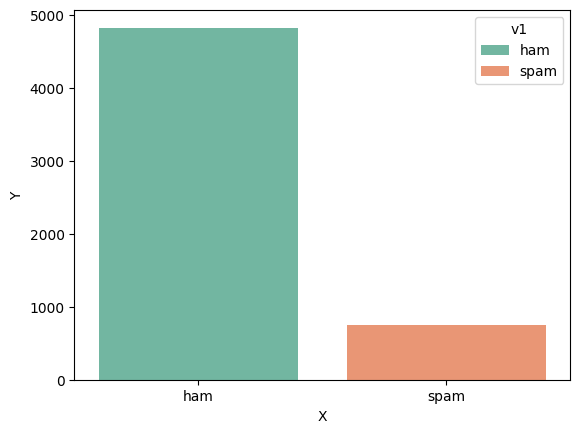

In [41]:
sns.countplot(x=df['v1'], hue=df['v1'], palette='Set2', legend=True)
plt.xlabel('X')
plt.ylabel("Y")
plt.show()

- since there is no null value in the dataset we won't perform any imputation or droping the rows.
- But the dataset is bias which is the two category ham and spam are 6.5:1 which is way off so we will have to balance the daaset.

In [ ]:
ham = df[df['v1'] == 'ham'].iloc[:1000] # increased for experiment
spam = df[df['v1'] == 'spam']
print(ham.shape)
print(spam.shape)
df_concat = pd.concat([ham,spam],ignore_index=True)
print(df_concat.shape)

print("Ratio: ",round(1100/747,1))

(1000, 6)
(747, 6)
(1747, 6)
Ratio:  1.5


DATA is ready now 

- now the ratio is 1:1

### Separtion of Feature and Target Variables

In [43]:
X = df_concat['v2']
Y = df_concat['v1']

print(X.shape, Y.shape)

(1747,) (1747,)


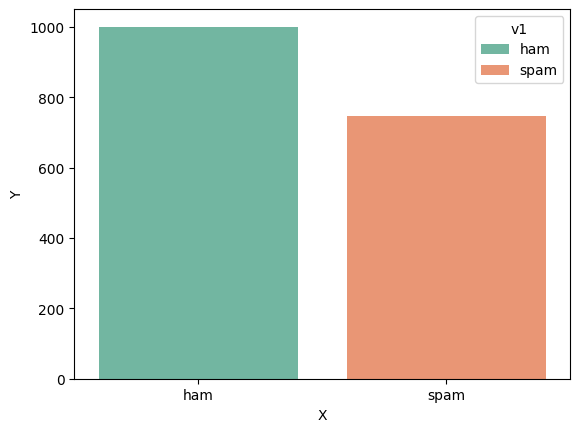

In [44]:
sns.countplot(x=Y, hue=Y, palette='Set2', legend=True)
plt.xlabel('X')
plt.ylabel("Y")
plt.show()

Raw Text Just strings—sentences, paragraphs, documents. Example: "I love Python. It's powerful and elegant."

Sentence Tokenization Breaks text into individual sentences. → ["I love Python.", "It's powerful and elegant."]

Word Tokenization Breaks sentences into words and punctuation. → ["I", "love", "Python", ".", "It", "'s", "powerful", "and", "elegant", "."]

Normalization The sklearn.preprocessing.normalize() function is designed for numerical vector normalization

Stopword Removal Removes common words like "the", "is", "and" that don’t add much meaning. → ["love", "python", "powerful", "elegant"]

Stemming or Lemmatization Reduces words to their root form. "running" → "run", "better" → "good"

Vectorization Converts words into numbers so models can understand them. TF-IDF, Bag of Words, Word2Vec, etc.

In [45]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')

stemmer = PorterStemmer()
df_concat['stemmed'] = X.apply(lambda X : " ".join(stemmer.stem(word) for word in word_tokenize(X))) 

[nltk_data] Downloading package punkt to C:\Users\Ashad
[nltk_data]     Shaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
print(df_concat.head())
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_concat['stemmed'])
print(X)

labelencoding = LabelEncoder()
Y = labelencoding.fit_transform(Y)
print("---------------------------------------")
print(Y)

   Unnamed: 0   v1                                                 v2  \
0           0  ham  Go until jurong point, crazy.. Available only ...   
1           1  ham                      Ok lar... Joking wif u oni...   
2           3  ham  U dun say so early hor... U c already then say...   
3           4  ham  Nah I don't think he goes to usf, he lives aro...   
4           6  ham  Even my brother is not like to speak with me. ...   

  Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0        NaN        NaN        NaN   
1        NaN        NaN        NaN   
2        NaN        NaN        NaN   
3        NaN        NaN        NaN   
4        NaN        NaN        NaN   

                                             stemmed  
0  go until jurong point , crazi .. avail onli in...  
1                      ok lar ... joke wif u oni ...  
2  u dun say so earli hor ... u c alreadi then sa...  
3  nah i do n't think he goe to usf , he live aro...  
4  even my brother is not like to speak with me ....  
<C

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=2,stratify=Y,test_size=0.2)

# Model

In [48]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [49]:
test_prediction = model.predict(X_test)
acc = accuracy_score(Y_test, test_prediction)
print(acc)

0.96


# Hyperparameter tunning

#### Classification models

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
models = {
    'lr' : LogisticRegression(max_iter=1000),
    'kn' : KNeighborsClassifier(),
    'rf' : RandomForestClassifier(),
    'dt' : DecisionTreeClassifier(),
    'svc' : SVC()
}

In [52]:
param_grids = {
    'lr': {'C': [0.1, 1, 10]},
    'svc': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'dt': {'max_depth': [None, 10, 20], 'criterion': ['gini', 'entropy']},
    'kn': {'n_neighbors': [3, 5, 7]},
    'rf': {'n_estimators': [100, 200], 'max_depth': [None, 10]},
}

In [53]:
for name in models:
    print(f"\n Tuning {name}...")
    grid = GridSearchCV(models[name], param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, Y_train)
    print(f"Best Params: {grid.best_params_}")
    print(f"Best Score: {grid.best_score_:.4f}")


 Tuning lr...
Best Params: {'C': 10}
Best Score: 0.9485

 Tuning kn...
Best Params: {'n_neighbors': 7}
Best Score: 0.9485

 Tuning rf...
Best Params: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.9556

 Tuning dt...
Best Params: {'criterion': 'gini', 'max_depth': None}
Best Score: 0.9263

 Tuning svc...
Best Params: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9521
